<a href="https://colab.research.google.com/github/arjun-kava/linear-regression-with-gradient-descent/blob/main/Linear_Regression_with_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing common function using NumPy
# Implementation of Linear Regression with Gradient Descent
We are going to use two major libraries `numpy` and `matplotlib`.


In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

## Mean Squared Error
mean squared error (MSE) or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.


In [3]:
def total_squared_error(data, m, b):
    """Total squared error between the data points and line
    y = mx + b SE_line = (y_1-(m*x_1+b))^2 + (y_2-(m*x_2)+b)^2 + ...+ 
    (y_n - (m*x_n + b))^2"""

    total_SE = 0
    for data_point in data:
        SE = (data_point[1] - (m * data_point[0] + b)) ** 2
        total_SE += SE

    return total_SE / len(data)

## Calculate partial difference
compute the ith partial difference quotient of function f w.r.t to ith position of v

In [14]:
def partial_difference_quotient(f, points, v, i, h):
    """compute the ith partial difference quotient of function f w.r.t to ith position of v"""

    # add h to just the ith element of v
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]

    return (f(points, w[0], w[1]) - f(points, v[0], v[1])) / h

## Estimate Gradient
estimate partial derivatives w.r.t. m and b using difference quotients

In [6]:
def estimate_gradient(points, current_m, current_b):
    """estimate partial derivatives w.r.t. m and b using difference quotients"""
    m = current_m
    b = current_b

    partial_wrt_m = partial_difference_quotient(
        total_squared_error, points, [m, b], i=0, h=0.0001)
    partial_wrt_b = partial_difference_quotient(
        total_squared_error, points, [m, b], i=1, h=0.0001)

    return partial_wrt_m, partial_wrt_b

## Defining Steps
take step 'downhill' in gradient descent process

In [7]:
def step(points, current_m, current_b, learningRate):
    """take step 'downhill' in gradient descent process"""

    # estimate gradient w.r.t. m and w.r.t. b
    partial_wrt_m, partial_wrt_b = estimate_gradient(
        points, current_m, current_b)

    # update m and b
    next_m = current_m - (learningRate * partial_wrt_m)
    next_b = current_b - (learningRate * partial_wrt_b)

    # update tolerance levels for m and b
    t_val = [next_m - current_m, next_b - current_b]

    return next_m, next_b, t_val

## Gradient Descent Algorithm
perform gradient descent for specified number of iterations or when specified tolerance levels are reached for both m and b

In [8]:
def gradient_descent(points, start_m, start_b, learningRate, numIterations, tolerance):
    """perform gradient descent for specified number of iterations or when specified tolerance
    levels are reached for both m and b"""

    # initialize search
    next_m = start_m
    next_b = start_b

    # keeping track of m and b steps for each iteration
    m_steps = []
    b_steps = []
    total_SE = []

    for i in range(numIterations):

        numIters = 0
        [next_m, next_b, t_val] = step(points, next_m, next_b, learningRate)

        # take step if m and b tolerance are greater than given tolerance value
        if abs(t_val[0]) >= tolerance and abs(t_val[1]) >= tolerance:
            m_steps.append(next_m)
            b_steps.append(next_b)
            # track total squared error
            total_SE.append(total_squared_error(points, next_m, next_b))
            numIters = i + 1
        else:
            break

    return next_m, next_b, m_steps, b_steps, total_SE, numIters

## Create line
create line with slope m and y-intercept b using x data points

In [9]:
def create_line(m, b, x):
    """create line with slope m and y-intercept b using x data points"""
    return m * x + b

# Perform Linear Regression

In [15]:
data = np.load('sampleData.npy')
x = [row[0] for row in data]
y = [row[1] for row in data]

m, b, m_steps, b_steps, SE, numIters = gradient_descent(
    data, start_m=0, start_b=0, learningRate=0.001, numIterations=1000, tolerance=0.0001)

print('m = {:.2f}, b = {:.2f}'.format(m, b))

m = 0.77, b = 0.11


## Plotting sample data points and line of best fit

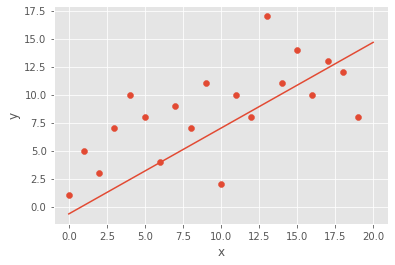

In [13]:
plt.figure(1)
line = [create_line(m, b, i) for i in range(min(x)-1, max(x)+1)]
plt.plot(line, label='y = {:.2f}x + {:.2f}'.format(m, b))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## m and b step progression

Text(0, 0.5, 'b')

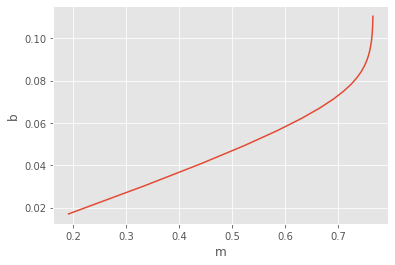

In [20]:
fig = plt.figure(2)
plt.plot(m_steps, b_steps)
plt.xlabel('m')
plt.ylabel('b')

## Lines created using m and b steps throughout gradient descent procedure

Text(0, 0.5, 'y')

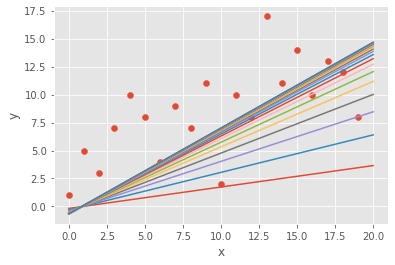

In [19]:
plt.scatter(x, y)
for i, j in zip(m_steps, b_steps):
    line = [create_line(i, j, k) for k in range(
        int(round(min(x))-1), int(round(max(x)+1)))]
    plt.plot(line)
plt.xlabel('x')
plt.ylabel('y')

## Total squared error vs. number of iterations

Text(0.5, 0, 'Number of Iterations')

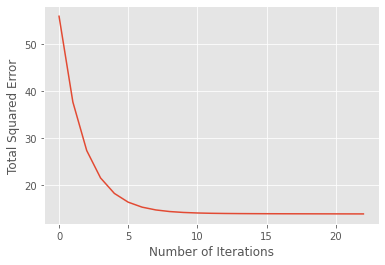

In [21]:
plt.plot(SE)
plt.ylabel('Total Squared Error')
plt.xlabel('Number of Iterations')


## Minimum error found on m,b surface plot

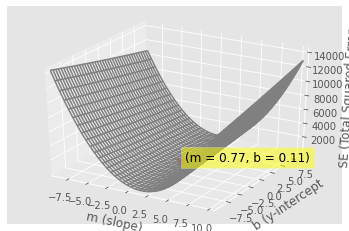

In [22]:
fig = plt.figure(3)
ax = fig.gca(projection='3d')

m_plot = np.arange(m - 10, m + 10, 0.5)
b_plot = np.arange(b - 10, b + 10, 0.5)
m_plot, b_plot = np.meshgrid(m_plot, b_plot)
SE = np.array(total_squared_error(data, m_plot, b_plot))

# Set axis limits
ax.set_zlim(np.min(SE), np.max(SE))
ax.set_xlim(np.min(m_plot), np.max(m_plot))
ax.set_ylim(np.min(b_plot), np.max(b_plot))

# Set axis labels
ax.set_xlabel('m (slope)')
ax.set_ylabel('b (y-intercept')
ax.set_zlabel('SE (Total Squared Error')

ax.plot_wireframe(m_plot, b_plot, SE, color='grey')
ax.scatter(m, b, total_squared_error(data, m, b), s=200, c='r',
            marker='*')  # , label = 'm = {}, b = {}'.format(m,b))
ax.text(m + 0.25, b + 0.25, total_squared_error(data, m, b),
        '(m = {:.2f}, b = {:.2f})'.format(m, b), size=12, bbox=dict(facecolor='yellow', alpha=0.5))

plt.show()